<a href="https://colab.research.google.com/github/payal6269/Plagiarism-Checker-15th-mini_project-/blob/main/plagcheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary modules!
import os  # Module for interacting with the operating system
from sklearn.feature_extraction.text import TfidfVectorizer  # Module for text vectorization using TF-IDF
from sklearn.metrics.pairwise import cosine_similarity  # Module for calculating cosine similarity

In [2]:
# Get a list of all text files in the current directory
student_files = [doc for doc in os.listdir() if doc.endswith('.txt')]

In [3]:
# Read the contents of each student's text file
student_notes = [open(_file, encoding='utf-8').read() for _file in student_files]

In [4]:
# Function to vectorize the text using TF-IDF
def vectorize(Text):
    return TfidfVectorizer().fit_transform(Text).toarray()

In [5]:
# Function to calculate cosine similarity between two documents
def similarity(doc1, doc2):
    return cosine_similarity([doc1, doc2])

In [6]:
# Vectorize the student notes using TF-IDF
vectors = vectorize(student_notes)
s_vectors = list(zip(student_files, vectors))
plagiarism_results = set()

In [7]:
# Function to check plagiarism among the student notes
def check_plagiarism():
    global s_vectors
    for student_a, text_vector_a in s_vectors:
        new_vectors = s_vectors.copy()
        current_index = new_vectors.index((student_a, text_vector_a))
        del new_vectors[current_index]
        for student_b, text_vector_b in new_vectors:
            # Calculate cosine similarity between two text vectors
            sim_score = similarity(text_vector_a, text_vector_b)[0][1]
            # Sort the student file names alphabetically to avoid duplicates
            student_pair = sorted((student_a, student_b))
            # Create a tuple with student file names and similarity score
            score = (student_pair[0], student_pair[1], sim_score)
            # Add the tuple to plagiarism_results set
            plagiarism_results.add(score)
    return plagiarism_results

In [8]:
# Print the plagiarism results
for data in check_plagiarism():
    print("Similarity data:\n", data)


Similarity data:
 ('Ben.txt', 'Clark.txt', np.float64(0.40890488440034695))
Similarity data:
 ('Arthur.txt', 'Clark.txt', np.float64(0.5430431121089815))
Similarity data:
 ('Arthur.txt', 'Ben.txt', np.float64(0.45953293176495946))


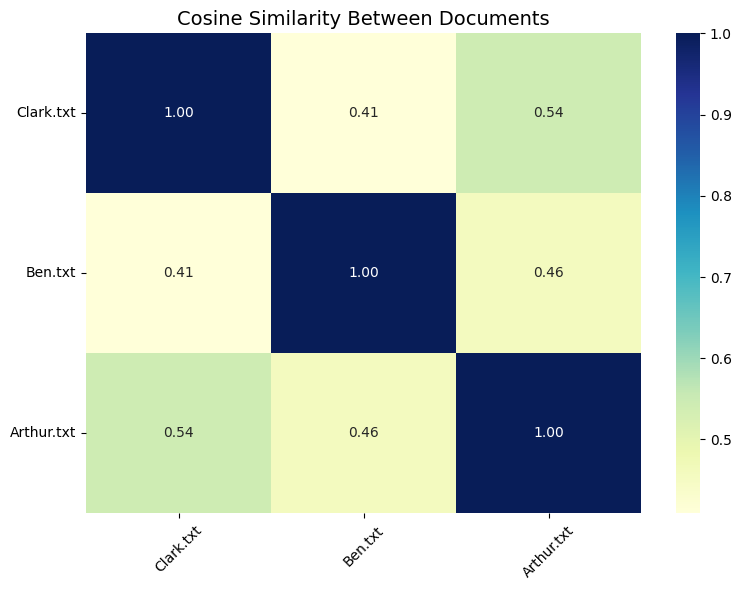

In [9]:
# 📊 Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os

# 📂 Load all .txt files in current working directory
student_files = [doc for doc in os.listdir() if doc.endswith('.txt')]
student_notes = [open(file, encoding='utf-8').read() for file in student_files]

# ✏️ Vectorize using TF-IDF
tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(student_notes)
similarity_matrix = cosine_similarity(vectors)

# 🧾 Create a DataFrame for the heatmap
df_similarity = pd.DataFrame(similarity_matrix, index=student_files, columns=student_files)

# 🎨 Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_similarity, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Cosine Similarity Between Documents", fontsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
